# Linear Advection with Finite Differences
## CH EN 6355 - Computational Fluid Dynamics
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**
<hr/>

We will be solving the linear advection equation
\begin{equation}
\frac{\partial u}{\partial t} = - c \frac{\partial u}{\partial x}
\end{equation}
subject to the initial condition $u(x,0)\equiv u_0(x)$ on the domain $[0,L]$. The exact solution for this equation is given by
\begin{equation}
u(x,t) = u_0(x-ct)
\end{equation}


In [62]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams['animation.html'] = 'html5' # this is used to display animations in jupyter notebooks

Let's start by defining an initial condition - let's take
\begin{equation}
    u_0(x) = \sin(\omega x)
\end{equation}

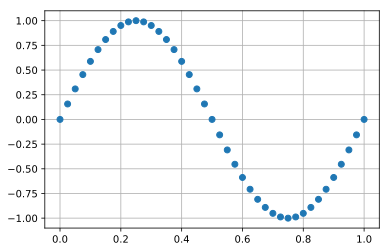

In [63]:
n = 41
L = 1.0
dx = L/(n-1)
x = np.linspace(0,L,n)
u0 = np.sin(2.0*np.pi*x)
plt.plot(x,u0,'o')
plt.grid()

## Forward in Time, Central in Space (FTCS)
Using a forward Euler method for the time derivative and a central discretization for the spatial derivative, the FTCS scheme results in
\begin{equation}
u_i^{n + 1} = u_i^n + c\Delta t\frac{u_{i + 1}^n - u_{i - 1}^n}{2\Delta x}
\end{equation}

In [64]:
# the following implementation does not use ghost cells
dt = 0.001  # s
tend = 2.0 # s
c = 10.0 # m/s - wave speed
cfl = c*dt/2.0/dx

sol = []
sol.append(u0)

t = 0.0
while t < tend:
    un = sol[-1]
    unew = un.copy()
    unew[1:-1] = un[1:-1] - cfl * (un[2:] - un[:-2])
    unew[-1] = un[-1] - cfl*(un[1] - un[-2]) # compute last point on the right using periodicity
    unew[0] = unew[-1] # set periodic boundary on the left
    sol.append(unew)
    t += dt

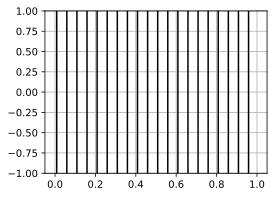

In [67]:
ims = []
fig = plt.figure(figsize=[4,3])
plt.grid()

i = 0
for solution in sol:
    if (i%10==0): # output frequency for frames  
        im = plt.plot(x,solution,'k-',animated=True)
        plt.ylim(-1,1)
        ims.append(im)
    i+=1
ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True,
                                repeat_delay=1000)
# ani.save('ftcs.mp4')   
ani

## Forward in Time, Backward (Upwind) in Space (FTUS)

We have shown in class that the previous FTCS scheme is unconditionally unstable. Here we will implement the upwind scheme in space

In [69]:
tend = 1.0 # s
c = 1.0 # m/s - wave speed
dt = dx/c  # run just at the CFL condition
cfl = c*dt/dx

sol = []
sol.append(u0)

t = 0.0
while t < tend:
    un = sol[-1]
    unew = un.copy()
    unew[1:-1] = un[1:-1] - cfl * (un[1:-1] - un[:-2])
    unew[-1] = un[-1] - cfl*(un[-1] - un[-2]) # compute last point on the right using periodicity
    unew[0] = unew[-1] # set periodic boundary on the left
    sol.append(unew)
    t += dt

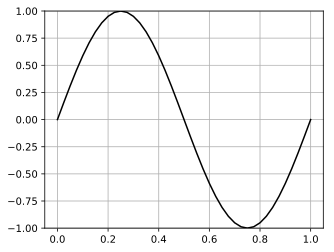

In [72]:
ims = []
fig = plt.figure(figsize=[5,4],dpi = 150)
plt.grid()

i = 0
for solution in sol:
    if (i%2==0):        
        im = plt.plot(x,solution,'k-',animated=True)
        plt.ylim(-1,1)
        ims.append(im)
    i+=1
ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True,
                                repeat_delay=1000)
# ani.save('ftus.mp4')   
ani

In [73]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get("https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css")
    return HTML(styles.text)
css_styling()
